In [17]:
from ramp import User, UseCase
import pandas as pd
import math

In [141]:
def hhmm2time(hh, mm):
    return int(round(hh * 60 + mm))
def time2hhmm(t):
    hh = int(math.floor(t / 60))
    mm = int(t - 60 * hh)
    return hh, mm

## TODO
+ Cooking Behaviour (user_preference)

In [265]:
household = User(
    user_name="Household",
    num_users=100,
)
# add_appliance is meth
indoor_bulb = household.add_appliance(
    name="Indoor Light Bulb",  # the name of the appliance
    number=6,  # how many of this appliance each user has in this user category
    power=7,  # the power (in Watt) of each single appliance. RAMP does not deal with units of measures, you should check the consistency of the unit of measures throughout your model
    num_windows=1,  # how many usage time windows throughout the day?
    func_time=100,  # the total usage time of appliances
    func_cycle=1,  # the minimum usage time after a switch on event
    window_1=[600, 900],  # from 24 to 00:30
    #window_2=[1170, 1440],  # from 19:30 to 24:00
    random_var_w=0,  # Variability of the windows in percentage
    time_fraction_random_variability=0,  # randomizes the total time the appliance is on (between 0 and 1)
)

<Axes: >

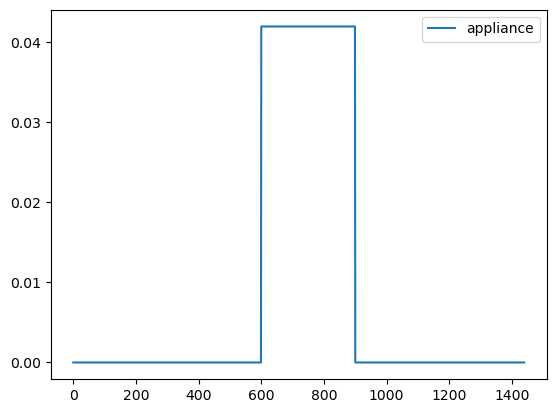

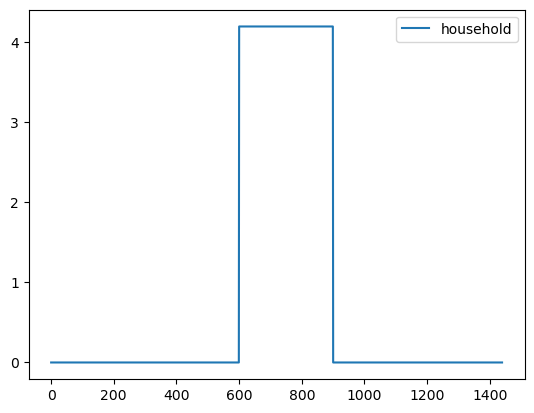

In [267]:
# Checking the maximum profile of the appliance and user

max_profile_bulb = pd.DataFrame(indoor_bulb.maximum_profile, columns=["appliance"])
max_profile_user = pd.DataFrame(household.maximum_profile, columns=["household"])

max_profile_bulb.plot()
max_profile_user.plot()

In [275]:
use_case = UseCase(
    users=[
        household
    ],  # A list of all the user categories to be included in the simulation. In this case, we only have household user category
    date_start="2020-01-01",  # starting date of the simulation
    date_end="2020-01-10",  # end date of the simulation
)

You will simulate 10 day(s) from 2020-01-01 00:00:00 until 2020-01-11 00:00:00


C:\Users\liche\AppData\Roaming\Python\Python312\site-packages\ramp\core\core.py:299: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  end=self.days[-1] + pd.Timedelta(1, "d") - pd.Timedelta(1, "T"),
C:\Users\liche\AppData\Roaming\Python\Python312\site-packages\ramp\core\core.py:297: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.__datetimeindex = pd.date_range(


In [277]:
whole_year_profile = use_case.generate_daily_load_profiles()

<Axes: >

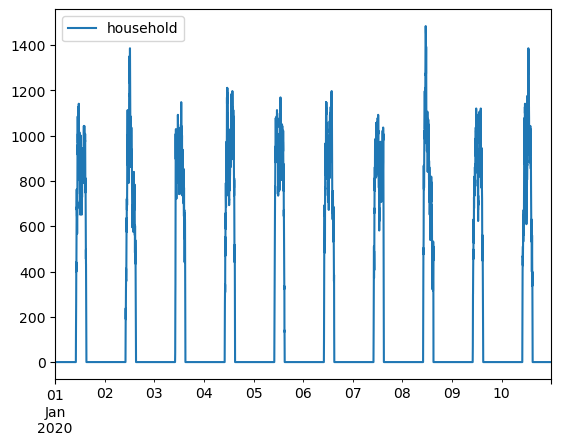

In [279]:
whole_year_profile = pd.DataFrame(
    whole_year_profile, columns=["household"], index=use_case.datetimeindex
)
whole_year_profile.plot()

<Axes: >

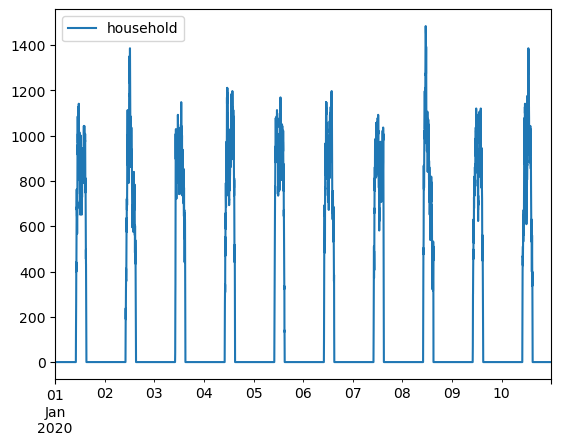

In [297]:
whole_year_profile.plot()

In [307]:
a = use_case.generate_daily_load_profiles()

In [335]:
import math
import matplotlib.pyplot as plt
def parse_load_profiles(p):
    n = int(math.floor(p.shape[0] / 1440))
    return p[:n*1440].reshape(n, 1440)
ap = parse_load_profiles(a)

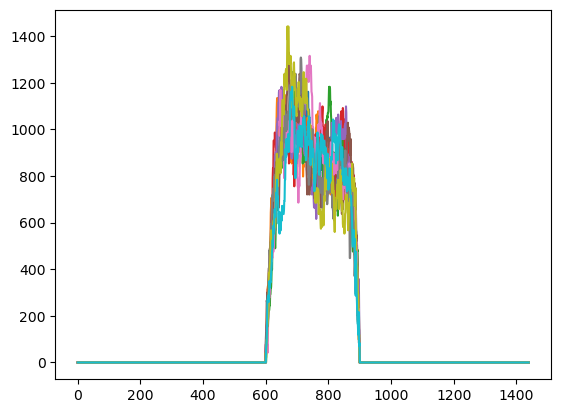

In [337]:
for ln in ap:
    plt.plot(ln)